# **Деревья решений**



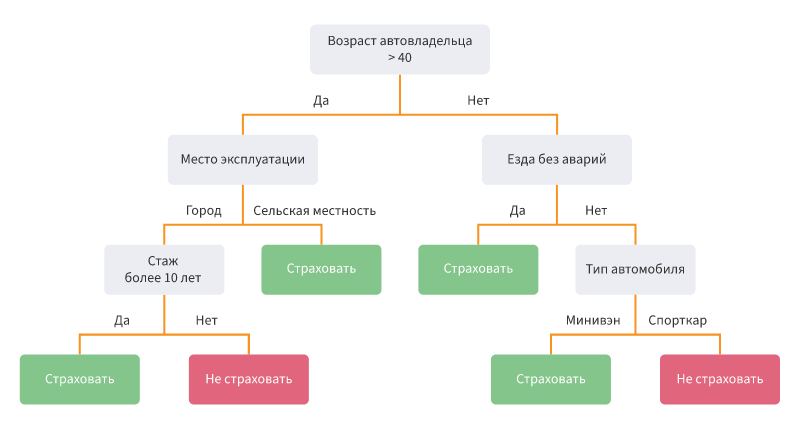

## **Структура дерева**

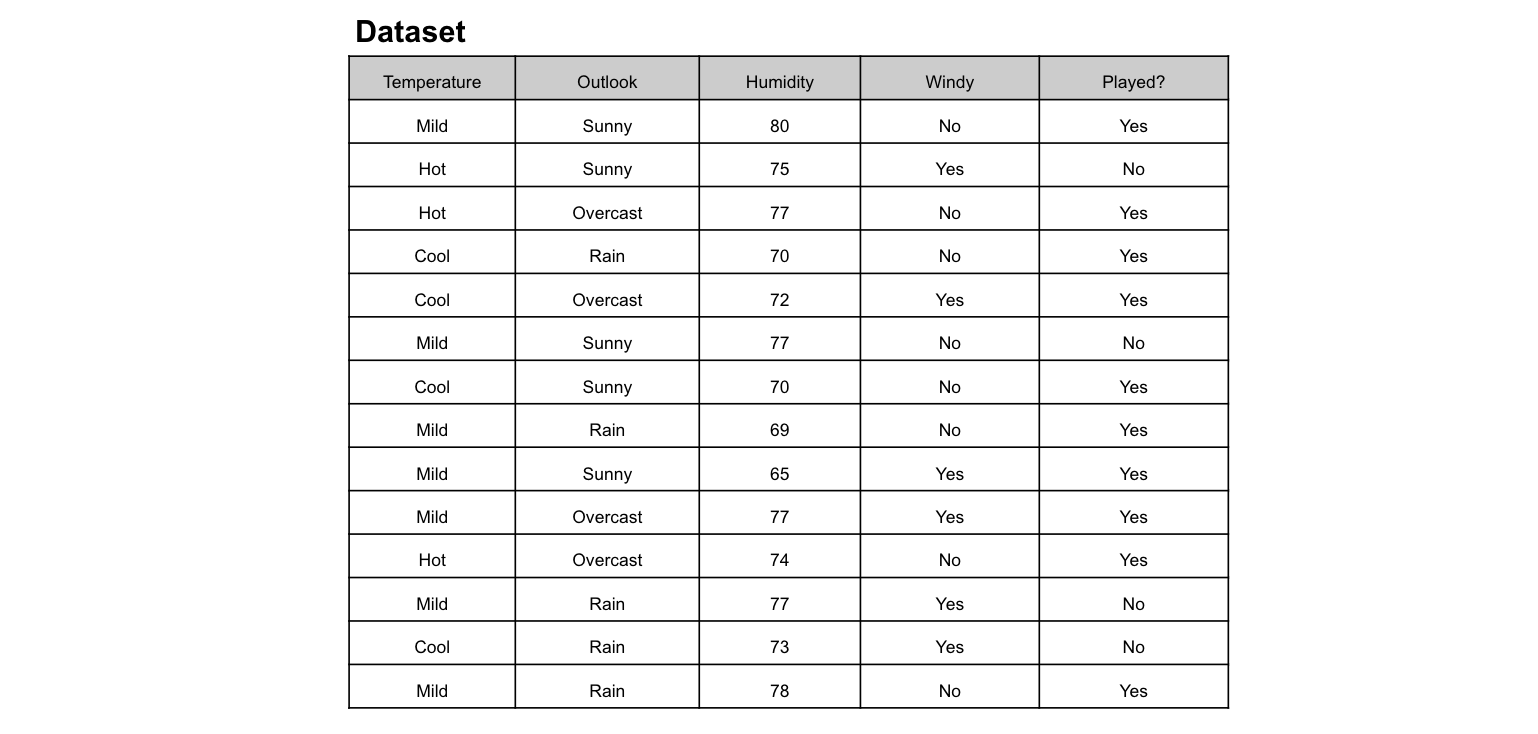

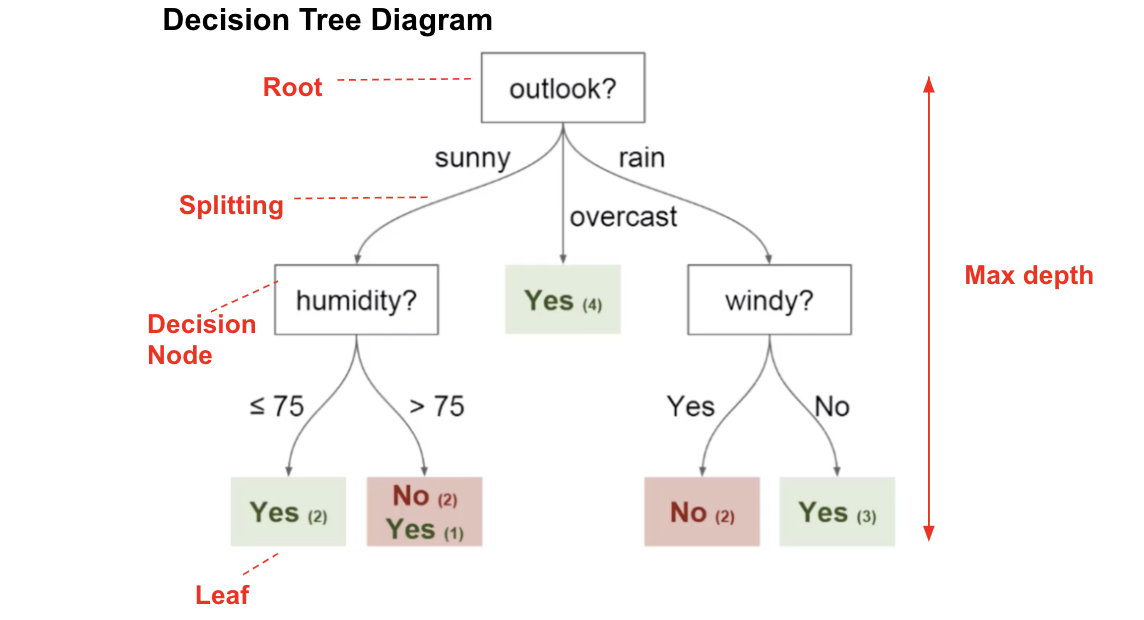

- Корневой узел: первое разделение, которое решает, что вся совокупность или выборочные данные должны быть далее разделены на два или более однородных набора.

- Разделение: это процесс разделения узла на два или более подузлов.

- Узел принятия решения: этот узел решает, когда и будет ли подузел разделяться на дополнительные подузлы или нет. 

- Лист: Конечный узел, который предсказывает результат (категориальное или непрерывное значение). Цветные узлы, то есть узлы «Да» и «Нет», являются листьями.

Вопрос: На основе какого атрибута (признака) разделить? Какой лучший сплит?

Ответ: используйте атрибут с наибольшим приростом информации или коэффициентом Джини.



## **ID3 (Итеративный разделитель)**

Алгоритм дерева решений ID3 использует прирост информации (в качестве метрики) для определения точек разделения. Чтобы измерить, сколько информации мы получаем, мы можем использовать энтропию для расчета однородности выборки.

Вопрос: Что такое «энтропия»? и какова его функция?

Ответ: это мера неопределенности в наборе данных. Энтропия определяет, как дерево решений решает разделить данные. На самом деле это влияет на то, как дерево решений рисует свои границы.

### **Формула энтропии**

\begin{equation}
H(x) = - \sum p(x) log(p(x))
\end{equation}

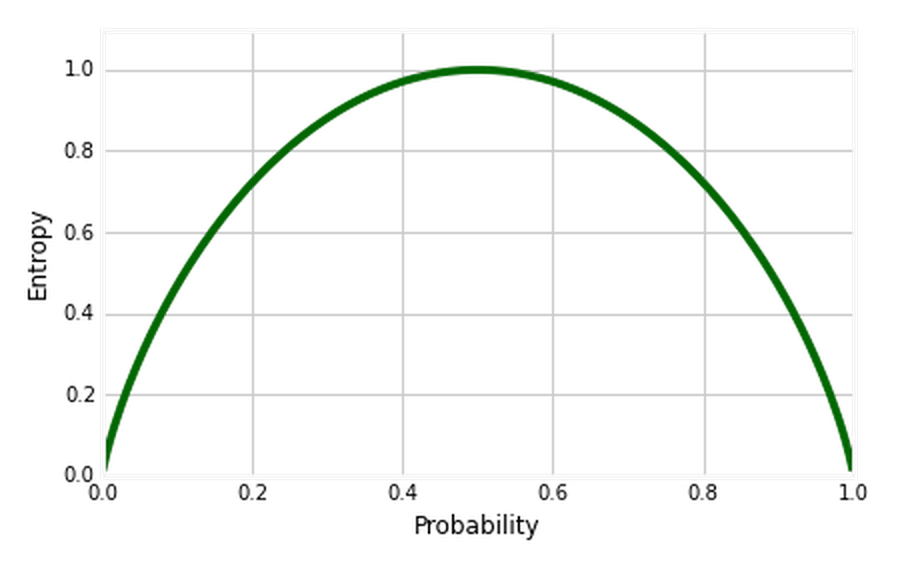

Если выборка полностью однородна, энтропия равна 0 (вероятность = 0 или 1), а если выборка равномерно распределена по классам, она имеет энтропию 1 (вероятность = 0,5).

Следующим шагом является поиск разделения, которое минимизирует энтропию. Мы используем прирост информации (производную энтропии), чтобы определить наилучшее разделение.

### **Расчет энтропии**

**Шаг 1**: Рассчет энтропии одного атрибута

Прогноз: Клэр будет играть в теннис/Клэр не будет играть в теннис

Всего 14 наблюдений (10 «Да» и 4 «Нет»). 

Вероятность (p) ответа «Да» равна 0,71428 (10/14), а вероятность ответа «Нет» равна 0,28571 (4/14). 

Затем можно рассчитать энтропию нашей целевой переменной, используя приведенное выше уравнение.

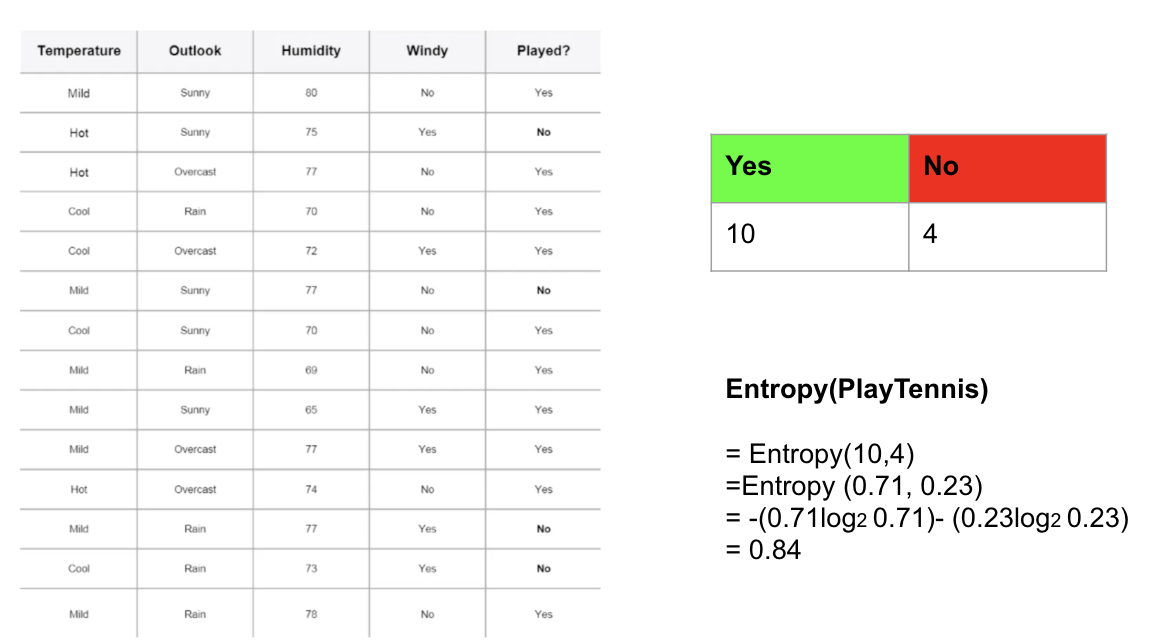

**Шаг 2**: Рассчет энтропии для каждой функции, используя переменную погоды.

Всего 14 наблюдений. Суммируя строки, мы видим, что 5 из них принадлежат солнечному дню, 4 принадлежат пасмурному дню и 5 принадлежат дождливому дню. 

Следовательно, мы можем найти вероятность Солнечного, Пасмурного и Дождливого дня, а затем вычислить их энтропию одну за другой, используя приведенное выше уравнение. 

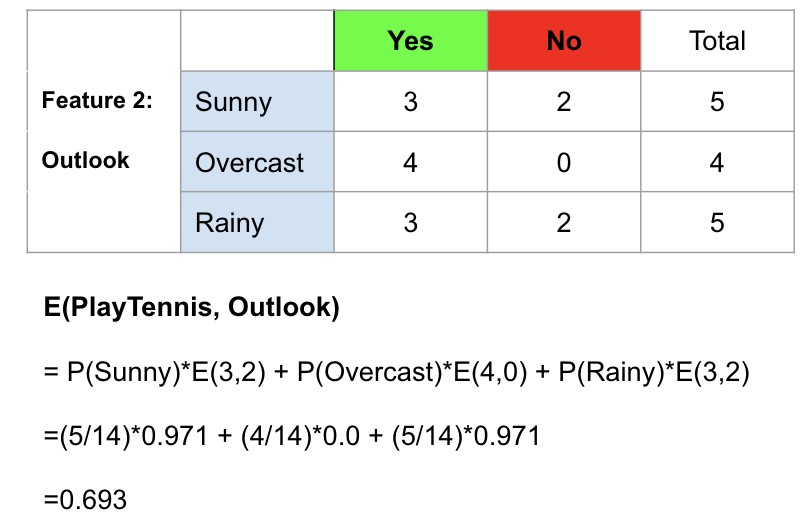

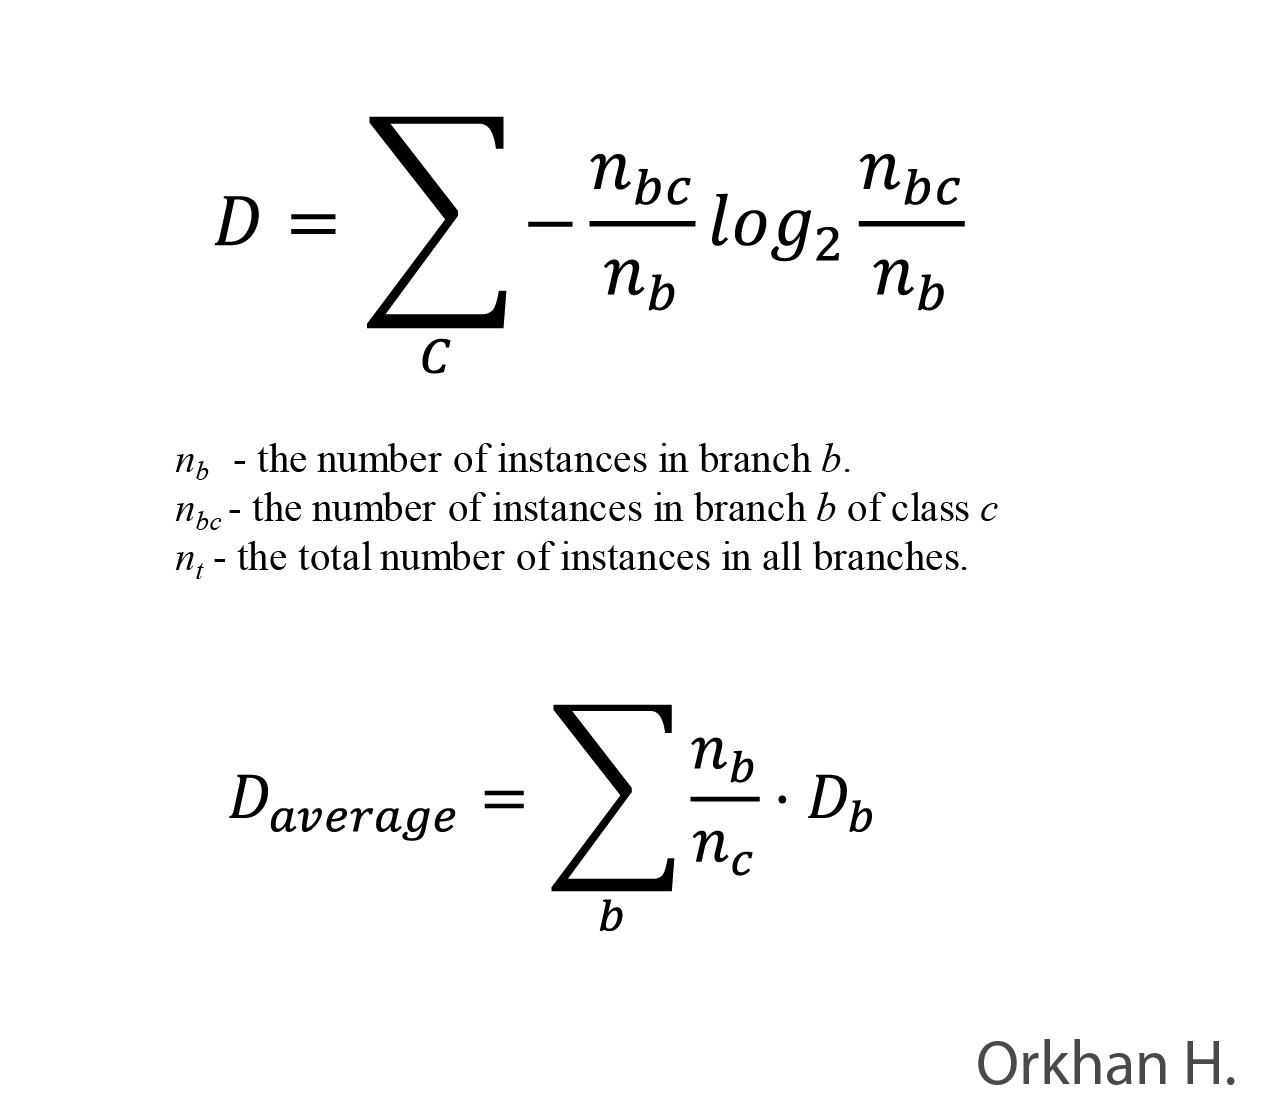

**Определение.** прирост информации — это уменьшение или увеличение значения энтропии при разделении узла.

### **Формула прироста информации**

\begin{equation}
IG(X,Y) = E(Y) - E(Y\ |\ X) 
\end{equation}

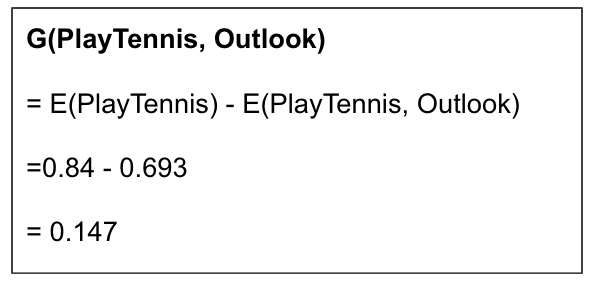

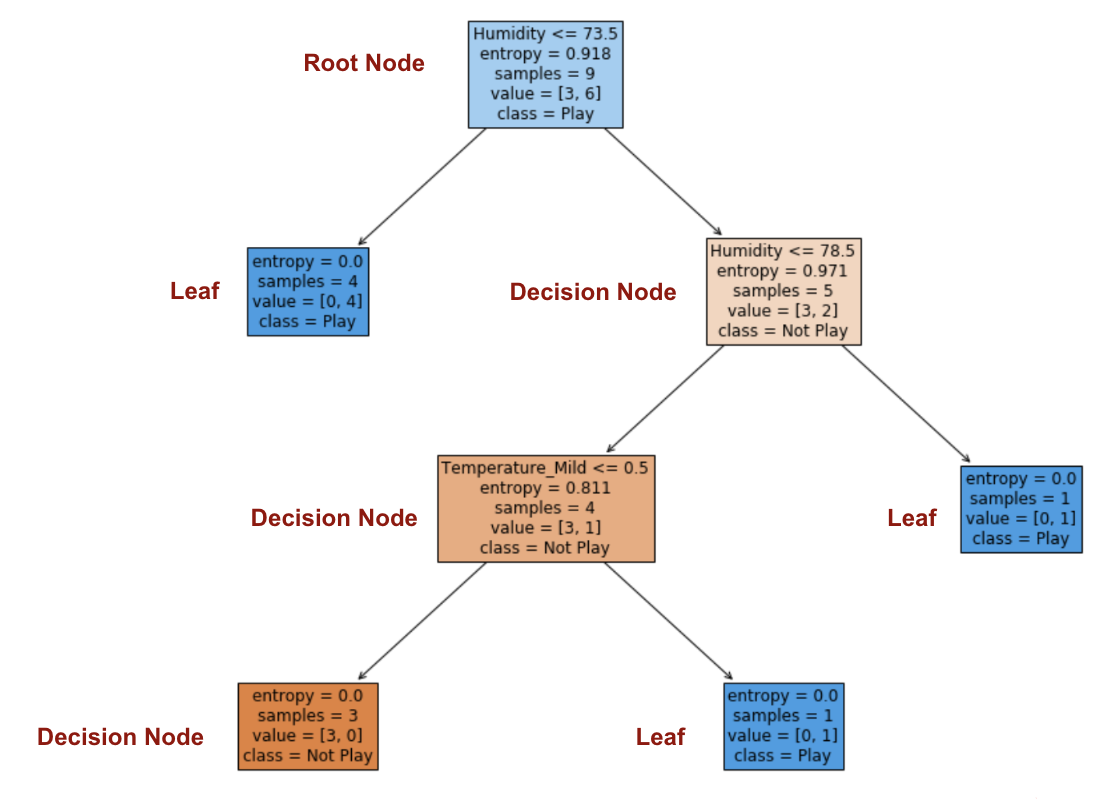

**Шаг 3**: Выбираем переменную с наибольшим приростом информации в качестве корневого узла.

Прирост информации по переменной «Влажность» является самым высоким на уровне 0,918. Влажность является корневым узлом.

**Шаг 4**: Ветка с энтропией 0 является конечным узлом, а ветвь с энтропией больше 0 требует дальнейшего разделения.

**Шаг 5**: Узлы рекурсивно выполняют предыдущие шаги в алгоритме ID3, пока все данные не будут классифицированы.

Возможно, вы слышали об алгоритме C4.5, усовершенствовании ID3, использующем Gain Ratio в качестве расширения для получения информации. Преимущество использования Gain Ratio заключается в решении проблемы смещения путем нормализации прироста информации с помощью Split Info.

## **CART (Classification and Regression Tree)**

Другой алгоритм дерева решений CART использует метод Джини для создания точек разделения, включая индекс Джини (примесь Джини) и прирост Джини.

**Определение индекса Джини**: вероятность присвоения выборке неправильной метки путем случайного выбора метки.

Индекс Джини также используется для измерения важности признаков в дереве.

### **Формула Индекса Джини**

\begin{equation}
Gini = 1 - \sum_j p_j^2
\end{equation}

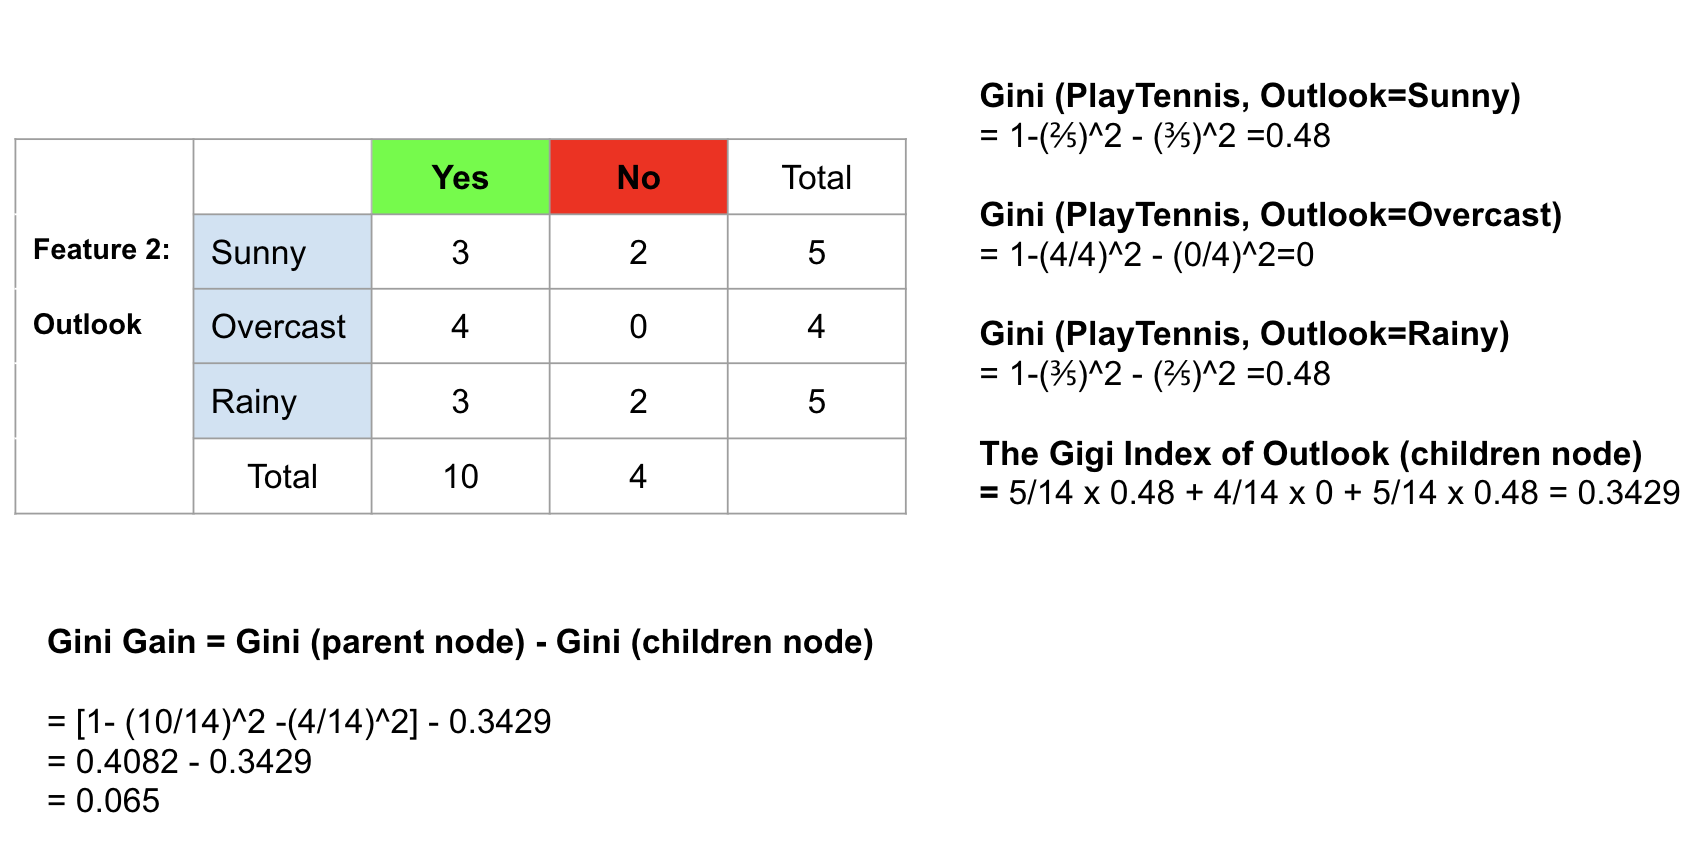

После вычисления коэффициента Джини для каждого атрибута sklearn.tree.DecisionTreeClassifier выберет атрибут с наибольшим коэффициентом Джини в качестве корневого узла. Ветвь с Gini, равным 0, является конечным узлом, а ветвь с Gini больше 0 требует дальнейшего разделения. Узлы растут рекурсивно до тех пор, пока все данные не будут классифицированы.


Как уже упоминалось, CART также может решать задачу регрессии, используя другой критерий разделения: среднеквадратичную ошибку (MSE) для определения точек разделения. Выходная переменная дерева регрессии является числовой, а входные переменные допускают сочетание непрерывных и категориальных переменных.

## **Отличия CART и ID3**

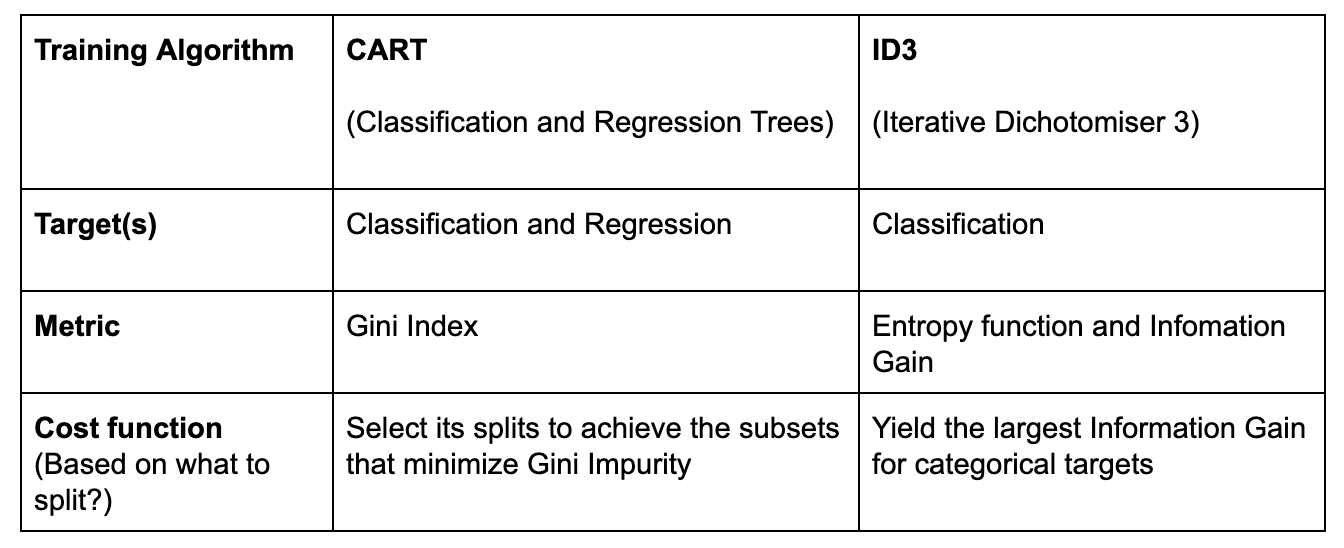

## **Разница между классификатором и регрессором**

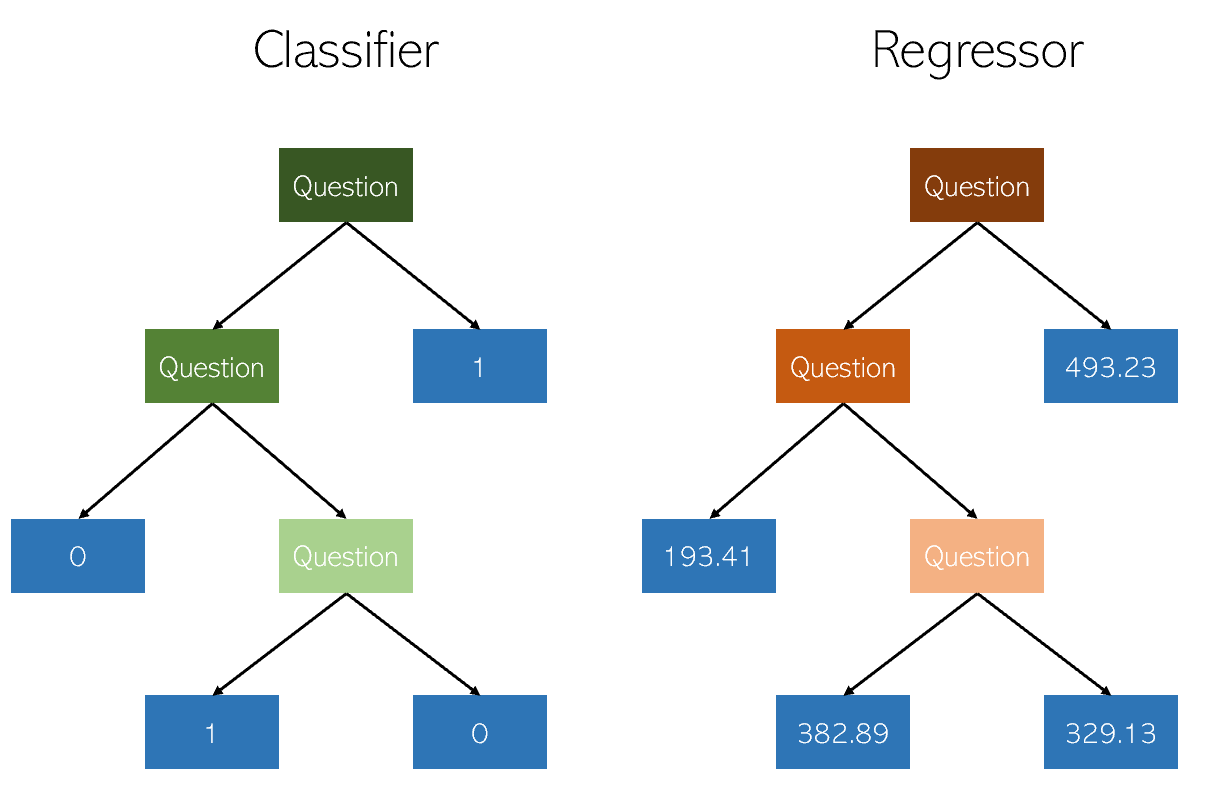

## **Классификация на деревьях**

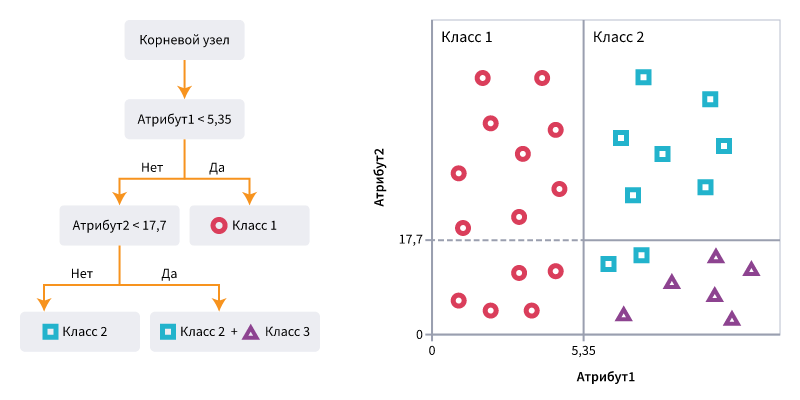

## **Регрессия на деревьях**

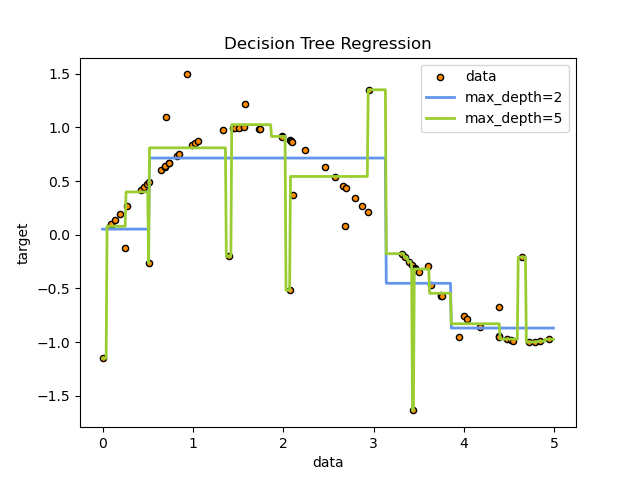

## **Важные гиперпараметры в обучении деревьев**

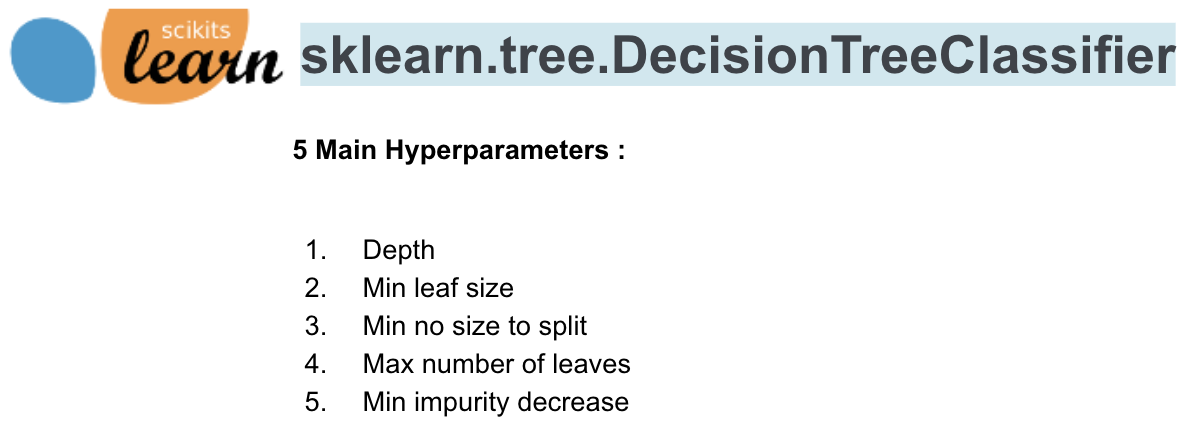

# **Классификация деревьями в sklearn**

### **Импорт библиотек**

In [ ]:
from sklearn.metrics import r2_score, f1_score, confusion_matrix, classification_report
from sklearn import tree
from sklearn import ensemble
from sklearn.model_selection import GridSearchCV, train_test_split
import sklearn.datasets as datasets

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### **Данные. Предпросмотр**

В качестве задачи к данному занятию будет рассмотрена задача классификации рукописных цифр из встроенной таблицы данных MNIST в google.colab

In [ ]:
data_train_classifier = pd.read_csv("/content/sample_data/mnist_train_small.csv", header=None)
data_test_classifier = pd.read_csv("/content/sample_data/mnist_test.csv", header=None)

In [ ]:
data_train_classifier.shape

(20000, 785)

In [ ]:
data_test_classifier.shape

(10000, 785)

In [ ]:
X_train = data_train_classifier.iloc[:, 1:]
Y_train = data_train_classifier.iloc[:, 0]
X_test = data_test_classifier.iloc[:, 1:]
Y_test = data_test_classifier.iloc[:, 0]

In [ ]:
Y_train.unique()

array([6, 5, 7, 9, 2, 0, 8, 3, 4, 1])

In [ ]:
Y_test.unique()

array([7, 2, 1, 0, 4, 9, 5, 6, 3, 8])

In [ ]:
X_train.head()

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_test.head()

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Как выглядит одна строчка данных из датасета
X_train.iloc[100, :].to_numpy()

Это цифра 6


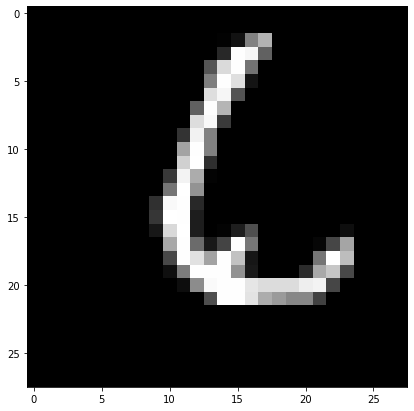

In [ ]:
# Отобразим одну строчку данных с помощью отрисовки картинки
number_of_image = 7

plt.figure(figsize=(7, 7))
plt.imshow(np.array(X_train.iloc[number_of_image, :]).reshape((28, 28)),
           cmap = "gray")
print(f"Это цифра {Y_train[number_of_image]}")

### **Модель в sklearn**

In [ ]:
model_DT_clf = tree.DecisionTreeClassifier(max_depth=15, min_samples_leaf=4)
model_DT_clf.fit(np.array(X_train), np.array(Y_train))

DecisionTreeClassifier(max_depth=15, min_samples_leaf=4)

### **Качество классификации**

In [ ]:
preds_DT_clf = model_DT_clf.predict(np.array(X_test))

In [ ]:
preds_train_DT_clf = model_DT_clf.predict(X_train)
print(classification_report(Y_train, preds_train_DT_clf))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96      1962
           1       0.96      0.98      0.97      2243
           2       0.91      0.94      0.92      1989
           3       0.94      0.92      0.93      2021
           4       0.94      0.93      0.94      1924
           5       0.92      0.91      0.92      1761
           6       0.97      0.94      0.95      2039
           7       0.96      0.95      0.96      2126
           8       0.93      0.91      0.92      1912
           9       0.93      0.93      0.93      2023

    accuracy                           0.94     20000
   macro avg       0.94      0.94      0.94     20000
weighted avg       0.94      0.94      0.94     20000



In [ ]:
print(confusion_matrix(Y_test, preds_DT_clf))

[[ 914    2   10    5    5   18    7    6    6    7]
 [   3 1069   13   10    8    3    4    6   17    2]
 [  25   19  851   23   13   11   13   33   33   11]
 [  24    9   41  791    9   51    6   18   34   27]
 [   0   12   17    8  830    8   11   12   21   63]
 [  31   11   17   54   18  687   22   17   13   22]
 [  28    7   28   14   21   24  811    4   17    4]
 [   6   14   21   18    8    4    2  918    8   29]
 [  18   20   47   25   26   41   17   13  740   27]
 [  11    4   13   16   32   13    7   29   41  843]]


In [ ]:
preds_train_DT_clf = model_DT_clf.predict(X_test)
print(classification_report(Y_test, preds_train_DT_clf))

              precision    recall  f1-score   support

           0       0.86      0.93      0.90       980
           1       0.92      0.94      0.93      1135
           2       0.80      0.82      0.81      1032
           3       0.82      0.78      0.80      1010
           4       0.86      0.85      0.85       982
           5       0.80      0.77      0.78       892
           6       0.90      0.85      0.87       958
           7       0.87      0.89      0.88      1028
           8       0.80      0.76      0.78       974
           9       0.81      0.84      0.82      1009

    accuracy                           0.85     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.85      0.85      0.84     10000



In [ ]:
f1_score(Y_test, preds_DT_clf, average="macro")

0.8431408886267958

In [ ]:
2**15

32768

In [ ]:
model_DT_clf.get_n_leaves()

912

In [ ]:
model_DT_clf.get_depth()

15

### **Использование модели**

Модель решающего дерева думает, что это цифра 5
Это была цифра 2


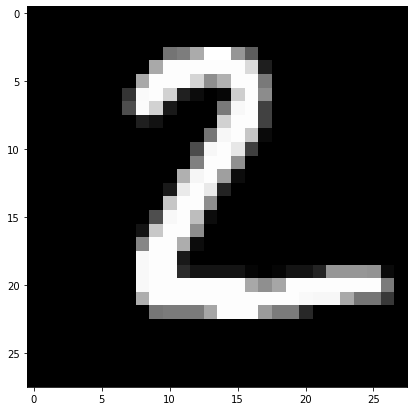

In [ ]:
# Число отвечает за то, какая строка из таблицы данных будет выдана в модель
# 0 и до 9998
num_of_test_row = 1

sample_number_from_test = np.array(X_test.iloc[num_of_test_row, :]).reshape(1, -1)

pred_test = model_DT_clf.predict(sample_number_from_test)

plt.figure(figsize = (7, 7))
plt.imshow(np.array(X_test.iloc[num_of_test_row, :]).reshape((28, 28)), 
           cmap="gray")
print(f"Модель решающего дерева думает, что это цифра {pred_test[0]}")
print(f"Это была цифра {Y_test[num_of_test_row]}")

### **Просмотр гиперпараметров**

In [ ]:
# Установленные параметры для обучения дерева
print(model_DT_clf.get_params())

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 15, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 4, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}


In [ ]:
# Количество листьев и глубина дерева
print(model_DT_clf.get_n_leaves())
print(model_DT_clf.get_depth())

912
15


## **Препрунинг. Или обрезка дерева до обучения**

Это означает остановку обучения еще до того, как будет создано полное дерево. Идея состоит в том, чтобы строить дерево только до тех пор, пока снижение RSS из-за каждого разделения превышает некоторый порог или не достигнута максимальная глубина дерева.

Это может привести недообучению, поскольку в некоторых случаях может произойти значительное снижение RSS на более поздних этапах создания дерева.

## **Постпроцессинг. Обрезка листьев**

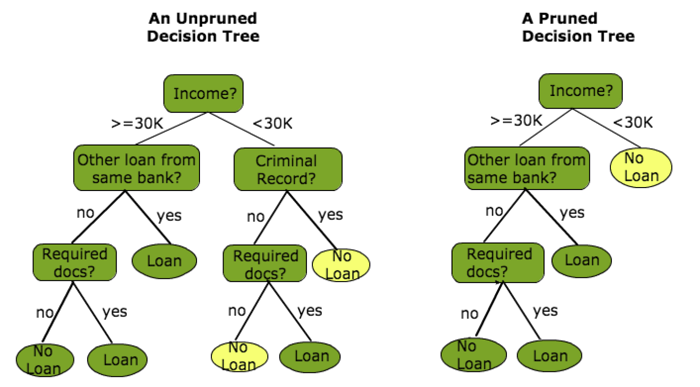

В пост-обрезке мы выращиваем большое дерево T0, а затем обрезаем его, чтобы получить поддерево таким образом, чтобы получить наименьшую частоту ошибок при тестировании.

Теперь проблема с этим алгоритмом заключается в том, что мы не хотим переходить к каждому поддереву и выбирать каждое из них, чтобы вычислить изменение частоты ошибок теста.

**Метод сокращение слабой ветви**:

Вводится параметр альфа, который показывает нам стоимость обрезки дерева по некоторой метрике:

Для каждого значения альфа у нас есть поддерево, которое может минимизировать значение

\begin{equation}
\sum\limits_{m=1}^{|T|}\sum\limits_{i:\ x_i\ \in\ {R_m}}(y_i−\overline{y}_{R_m})^2+ \alpha\cdot|T|
\end{equation}

$R_m$ — данные, соответствующие m-му конечному узлу.

$\overline{y}_{R_m}$ — среднее значение обучающих наблюдений в $R_m$


### **Шаги по использованию алгоритма обрезки дерева**

- На тренировочных данных обучите большое дерево, остановившись только тогда, когда конечный узел содержит меньше некоторого минимального количества наблюдений. Например, мы будем продолжать делить до тех пор, пока в каждом листе не будет меньше 20 точек данных.

- Примените метод сокращения слабой ветви к большому дереву и получите последовательность лучших поддеревьев как функцию альфы. Идея состоит в том, чтобы минимизировать функцию стоимости-сложности.

\begin{equation}
 C_{\alpha}(T)=R(T)+ \alpha |T|
\end{equation}

где T - количество листьев дерева

R(T) — функция потерь, вычисляемая по листьям.


- Используйте перекрестную проверку K-Fold, чтобы выбрать альфа. 

- Выберите альфа-значение с минимальной средней ошибкой.

- Выберите поддерево, соответствующее выбранному значению альфы.

## **Обрезка дерева в Sklearn**

Чтобы получить различные применимые альфа-значения и соответствующие значения Gini-примесей в листовых узлах, появившихся из-за этого, мы можем использовать функцию cost_complexity_pruning_path, присутствующую в классе DecisionTreeClassifier.

In [ ]:
from sklearn.datasets import load_breast_cancer

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
print(X.shape)

(569, 30)


In [ ]:
print(y.shape)

(569,)


In [ ]:
model_DT_ccpp = tree.DecisionTreeClassifier()
path = model_DT_ccpp.cost_complexity_pruning_path(X_train, y_train)
path

{'ccp_alphas': array([0.        , 0.00226647, 0.00464743, 0.0046598 , 0.0056338 ,
        0.00704225, 0.00784194, 0.00911402, 0.01144366, 0.018988  ,
        0.02314163, 0.03422475, 0.32729844]),
 'impurities': array([0.        , 0.00453294, 0.01847522, 0.02313502, 0.02876883,
        0.03581108, 0.04365302, 0.05276704, 0.0642107 , 0.0831987 ,
        0.10634033, 0.14056508, 0.46786352])}

Text(0, 0.5, 'total impurity of leaves')

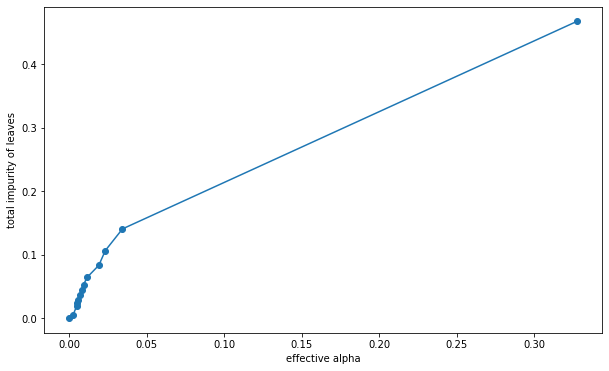

In [ ]:
ccp_alphas, impurities = path.ccp_alphas, path.impurities

plt.figure(figsize=(10, 6))
plt.scatter(ccp_alphas, impurities)
plt.plot(ccp_alphas, impurities)
plt.xlabel("effective alpha")
plt.ylabel("total impurity of leaves")

Найдем оптимальное значение альфы используя перебор моделей

In [ ]:
clfs = []

for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

Как мы уже знаем, существует сильная связь между альфой и глубиной дерева. Мы можем найти отношение, используя этот график.

Text(0, 0.5, 'total depth')

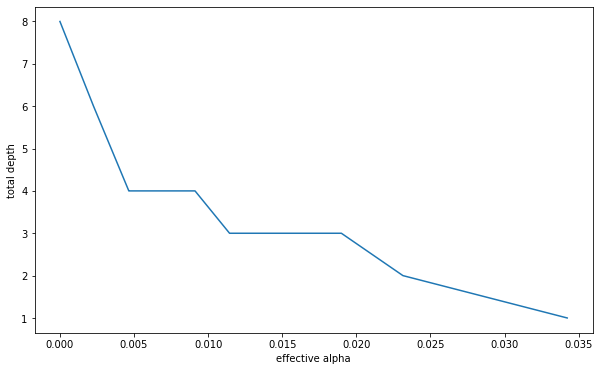

In [ ]:
tree_depths = [clf.tree_.max_depth for clf in clfs]
plt.figure(figsize=(10,  6))
plt.plot(ccp_alphas[:-1], tree_depths[:-1])
plt.xlabel("effective alpha")
plt.ylabel("total depth")


Text(0, 0.5, 'Accuracy scores')

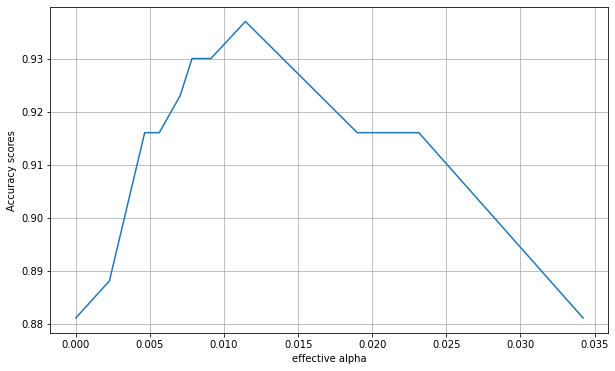

In [ ]:
from sklearn.metrics import accuracy_score

acc_scores = [accuracy_score(y_test, clf.predict(X_test)) for clf in clfs]

tree_depths = [clf.tree_.max_depth for clf in clfs]
plt.figure(figsize=(10,  6))
plt.grid()
plt.plot(ccp_alphas[:-1], acc_scores[:-1])
plt.xlabel("effective alpha")
plt.ylabel("Accuracy scores")


## **Обучение дерева с поиском оптимальных гиперпараметров на сетке**

### **Объявление сетки гиперпараметров**

In [ ]:
data_train_classifier = pd.read_csv("/content/sample_data/mnist_train_small.csv", header=None)
data_test_classifier = pd.read_csv("/content/sample_data/mnist_test.csv", header=None)
X_train = data_train_classifier.iloc[:, 1:]
Y_train = data_train_classifier.iloc[:, 0]
X_test = data_test_classifier.iloc[:, 1:]
Y_test = data_test_classifier.iloc[:, 0]


model_DT_gscv = tree.DecisionTreeClassifier()
params_grid = {
    "ccp_alpha": [0.0],
    "class_weight": [None],
    "criterion": ['gini'],
    "max_depth": [12, 15, 18],
    "max_features": [None],
    "max_leaf_nodes": [None],
    "min_impurity_decrease": [0.0],
    "min_samples_leaf": [1, 5, 10],
    "min_samples_split": [2, 12, 22],
    'min_weight_fraction_leaf': [0.0], 
    'random_state': [None], 
    'splitter': ['best']
    }


grid_search_DT_clf = GridSearchCV(estimator=model_DT_gscv, 
                                  param_grid=params_grid, 
                                  scoring="f1_macro", 
                                  cv = 4)

### **Обучение модели с перебором гиперпараметров на сетке**

In [ ]:
grid_search_DT_clf.fit(np.array(X_train), np.array(Y_train))
preds_train = grid_search_DT_clf.predict(np.array(X_train))
print("Оценка классификации на обучении ", f1_score(Y_train, preds_train, average="macro"))

Оценка классификации на обучении  0.9648893902533434


In [ ]:
grid_search_DT_clf.best_estimator_

DecisionTreeClassifier(max_depth=12)

In [ ]:
preds_DT_gscv = grid_search_DT_clf.predict(np.array(X_test))

In [ ]:
f1_score(Y_test, preds_DT_gscv, average="macro")

0.8424279297316893

# **Случайный лес**

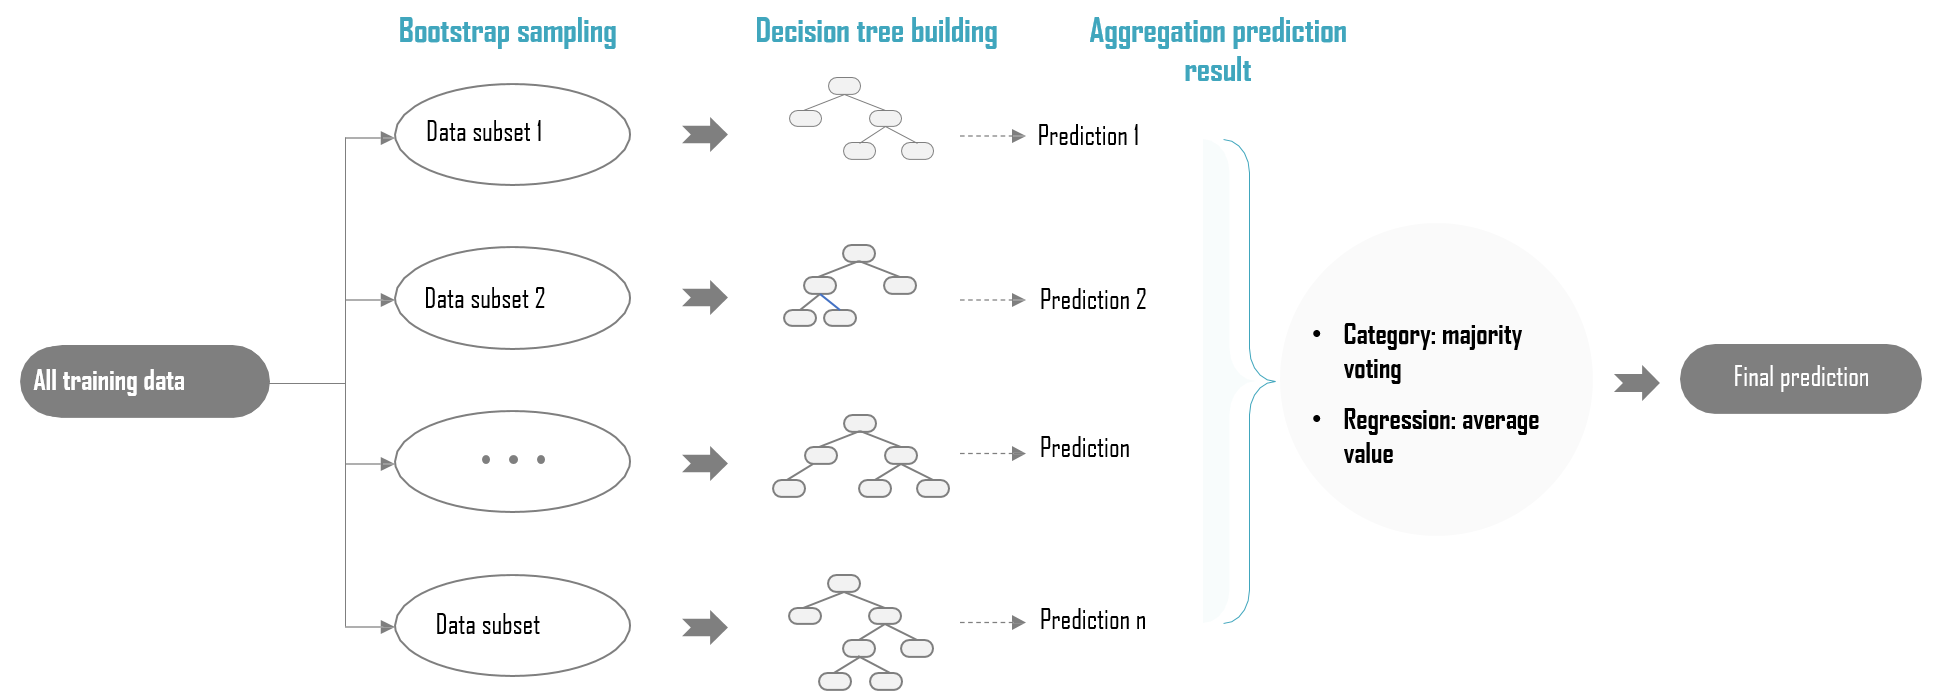



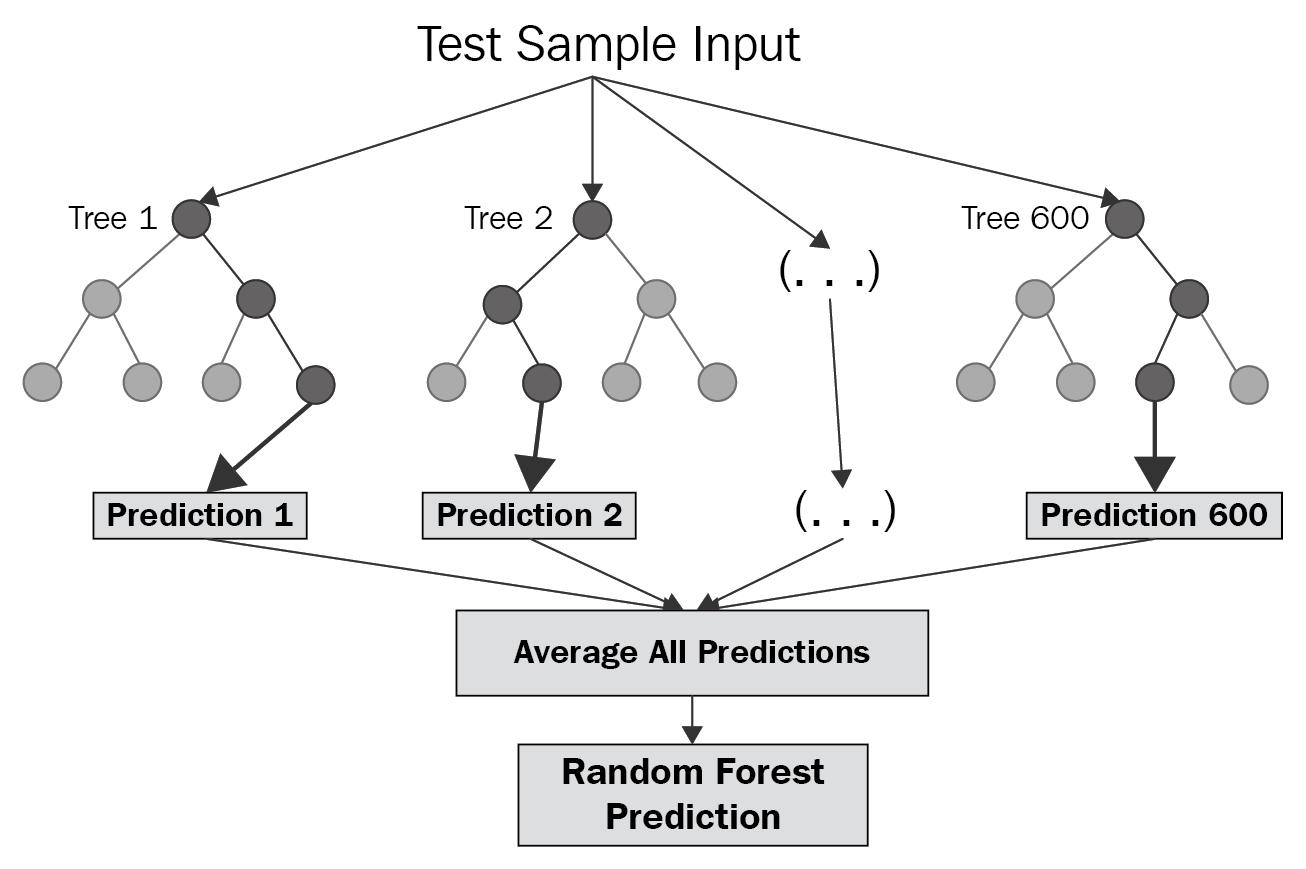

In [ ]:
model_RF_clf = ensemble.RandomForestClassifier()
model_RF_clf.fit(np.array(X_train), np.array(Y_train))
preds_RF_clf = model_RF_clf.predict(np.array(X_test))
print(confusion_matrix(Y_test, preds_RF_clf))

[[ 969    0    0    0    0    2    3    1    4    1]
 [   0 1119    5    3    1    1    3    0    2    1]
 [   5    1  984    9    7    1    4   13    7    1]
 [   2    0   16  957    0   10    0   12    9    4]
 [   1    0    3    0  944    0    8    0    2   24]
 [   8    3    2   16    3  838   11    1    7    3]
 [  12    3    0    0    4    4  934    0    1    0]
 [   1    4   22    1    3    0    0  974    3   20]
 [   3    1    5   13    9    6    7    6  910   14]
 [   8    6    6    9   11    4    2    4   11  948]]


In [ ]:
print(f1_score(Y_test, preds_RF_clf, average = "macro"))

0.9573498699780529


In [ ]:
model_RF_clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

## **Градиентный бустинг**



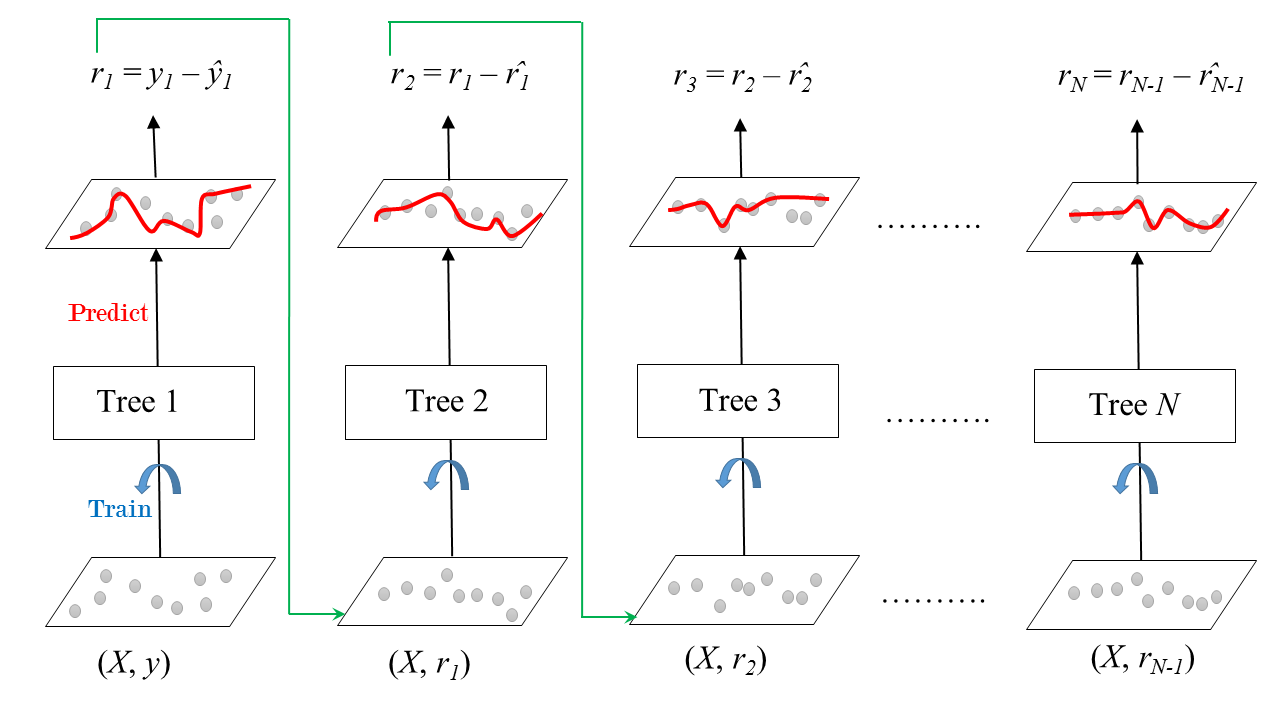

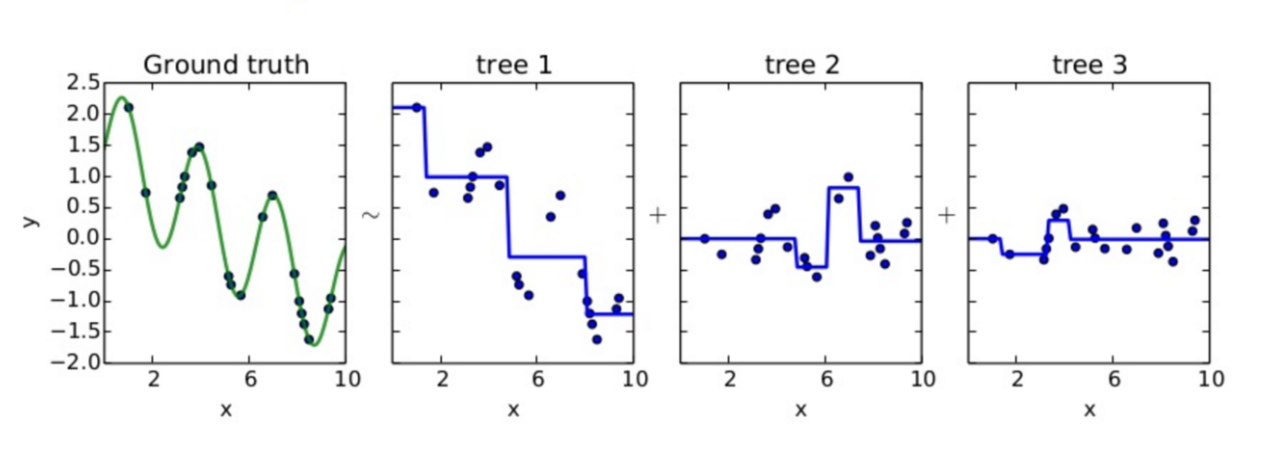

In [ ]:
!pip3 install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.2 MB/s 


In [ ]:
import catboost as cb

In [ ]:
model_catboost_clf = cb.CatBoostClassifier(iterations=2000,
                                           task_type="GPU",
                                           devices='0')
model_catboost_clf.fit(X_train, Y_train)

In [ ]:
preds_catboost_clf = model_catboost_clf.predict(np.array(X_test), task_type="CPU")
print(confusion_matrix(Y_test, preds_catboost_clf))

[[ 970    0    1    1    0    3    3    1    1    0]
 [   0 1124    3    1    0    1    3    1    2    0]
 [   4    3  988    7    6    1    6   10    6    1]
 [   0    0    9  972    0   11    0    8    7    3]
 [   1    0    3    0  953    0    6    0    4   15]
 [   2    0    0    8    2  859   11    1    6    3]
 [   6    3    1    0    5    4  937    1    1    0]
 [   0    6   20    3    4    0    0  981    0   14]
 [   6    0    2    8    5    3    5    7  927   11]
 [   4    5    2   11    7    2    1    4    4  969]]


In [ ]:
print(f1_score(Y_test, preds_catboost_clf, average = "macro"))

0.9677912170138911


# **Регрессия**

## **Дерево решений**

In [ ]:
data_regression = pd.read_csv("/content/sample_data/california_housing_train.csv")
test_regression = pd.read_csv("/content/sample_data/california_housing_test.csv")

In [ ]:
X_train = data_regression.iloc[:, :-1]
X_test = test_regression.iloc[:, :-1]
Y_train = data_regression.iloc[:, -1]
Y_test = test_regression.iloc[:, -1]

In [ ]:
Y_test

0       344700.0
1       176500.0
2       270500.0
3       330000.0
4        81700.0
          ...   
2995    225000.0
2996    237200.0
2997     62000.0
2998    162500.0
2999    500001.0
Name: median_house_value, Length: 3000, dtype: float64

In [ ]:
model_DT_regr = tree.DecisionTreeRegressor()
model_DT_regr.fit(X_train, Y_train)
preds_DT_regr = model_DT_regr.predict(X_test)
print(r2_score(Y_test, preds_DT_regr)) 

0.6491015589521545


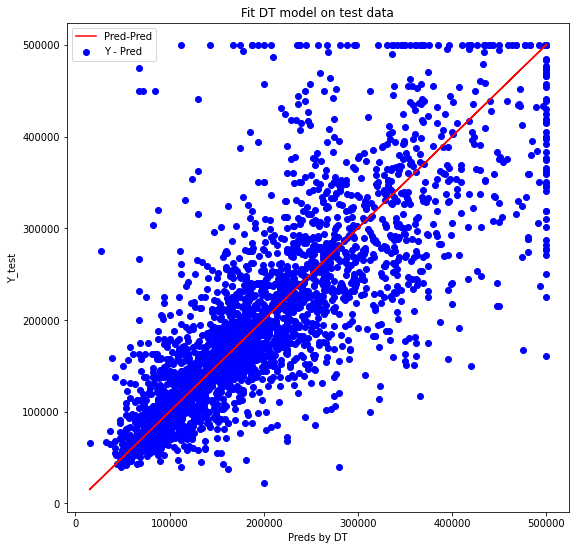

In [ ]:
plt.figure(figsize = (9, 9))
plt.plot(preds_DT_regr, preds_DT_regr, c="r", label = "Pred-Pred")
plt.scatter(preds_DT_regr, Y_test, c = "b", label = "Y - Pred")
plt.legend()
plt.title("Fit DT model on test data")
plt.xlabel("Preds by DT")
plt.ylabel("Y_test")
plt.show()

## **Случайный лес**

In [ ]:
model_RF_regr = ensemble.RandomForestRegressor(n_estimators=50)
model_RF_regr.fit(X_train, Y_train)
preds_RF_regr = model_RF_regr.predict(X_test)
print(r2_score(Y_test, preds_RF_regr)) 

0.80877382754891


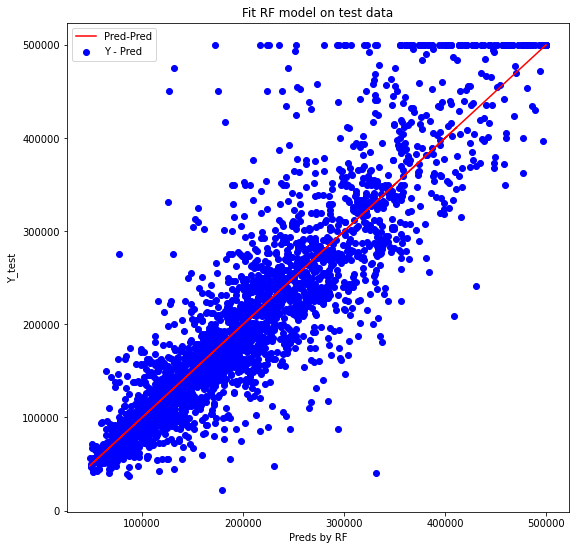

In [ ]:
plt.figure(figsize = (9, 9))
plt.plot(preds_RF_regr, preds_RF_regr, c="r", label = "Pred-Pred")
plt.scatter(preds_RF_regr, Y_test, c = "b", label = "Y - Pred")
plt.legend()
plt.title("Fit RF model on test data")
plt.xlabel("Preds by RF")
plt.ylabel("Y_test")
plt.show()

## **Градиентный бустинг**

In [ ]:
model_catboost_regr = cb.CatBoostRegressor(iterations=4000,
                                          task_type="GPU",
                                          devices='0', )
model_catboost_regr.fit(X_train, Y_train)

In [ ]:
preds_catboost_regr = model_catboost_regr.predict(X_test)
print(r2_score(Y_test, preds_catboost_regr))

0.8204925658564763


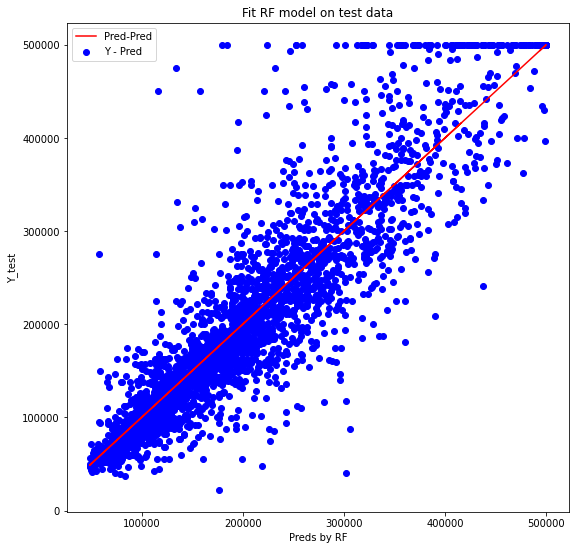

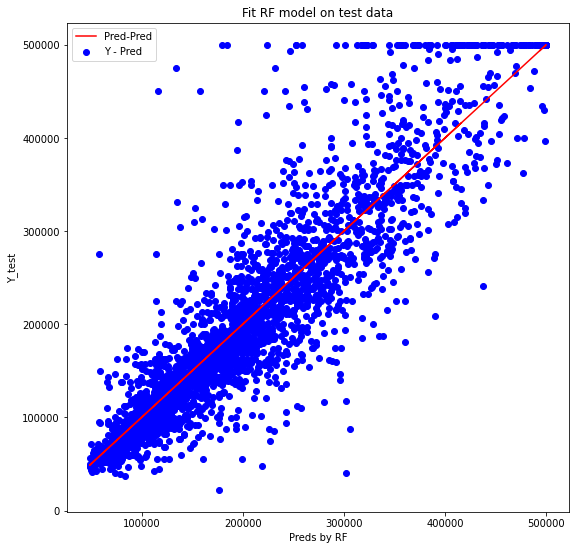

In [ ]:
plt.figure(figsize = (9, 9))
plt.plot(preds_RF_regr, preds_RF_regr, c="r", label = "Pred-Pred")
plt.scatter(preds_RF_regr, Y_test, c = "b", label = "Y - Pred")
plt.legend()
plt.title("Fit RF model on test data")
plt.xlabel("Preds by RF")
plt.ylabel("Y_test")
plt.show()

# **Задание. Дожди в Австралии**

Построить модель прогнозирования значений в столбце RainTomorrow (классификация) по заданной таблице наблюдений за погодой в Австралии.

В качестве тестовых данных выбрат последние два месяца наблюдений за погодой во всех точках Австралии.

Скорее всего, будет необходимо строить разные модели под разные точки наблюдения ввиду разницы в климате под влиянием различных прибрежных зон.

**Рекомендации**:

1. Скорее всего, для начала стоит построить простую модель по числовым наблюдениям, проверив данные на пропуски и очистки дней с пропусками в числовых наблюдениях.

2. Даты можно превратить в несколько новых колонок (День, Месяц, День недели, День месяца, День года).

3. Для улучшения качества модели воспользоваться категориальными признаками, превратив их в Дамми-переменные

In [ ]:
!pip3 install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.2 MB/s 


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.tree as tree
import seaborn as sns
sns.set()

from sklearn.metrics import r2_score, f1_score, confusion_matrix, classification_report
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import ensemble
from sklearn.model_selection import GridSearchCV, train_test_split

import catboost as cb

- Date: The date of observation 

- Location: The common name of the location of the weather station

- MinTemp: The minimum temperature in degrees celsius

- MaxTemp: The maximum temperature in degrees celsius

- RainFall: The amount of rainfall recorded for the day in mm

- Evaporation: The so-called Class A pan evaporation (mm) in the 24 hours to 9am

- Sunshine: The number of hours of bright sunshine in the day.

- WindGustDir: The direction of the strongest wind gust in the 24 hours to midnight

- WindGustSpeed: The speed (km/h) of the strongest wind gust in the 24 hours to midnight

- WindDir9am: Direction of the wind at 9am

- WindDir3pm: Direction of the wind at 3pm

- WindSpeed9am: Wind speed (km/hr) averaged over 10 minutes prior to 9am

- WindSpeed3pm: Wind speed (km/hr) averaged over 10 minutes prior to 3pm

- Humidity9am: Humidity (percent) at 9am

- Humidity3pm: Humidity (percent) at 9am

- Pressure9am: Atmospheric pressure (hpa) reduced to mean sea level at 9am

- Pressure3pm: Atmospheric pressure (hpa) reduced to mean sea level at 3pm

- Cloud9am: Fraction of sky obscured by cloud at 9am. This is measured in "oktas", which are a unit of eigths. It records how many

- Cloud3pm: Fraction of sky obscured by cloud (in "oktas": eighths) at 3pm. See Cload9am for a description of the values

- Temp9am: Temperature (degrees C) at 9am

- Temp3pm: Temperature (degrees C) at 3pm

- RainToday: Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0

- RainTomorrow: The amount of next day rain in mm. Used to create response variable RainTomorrow. A kind of measure of the "risk".

In [ ]:
# Импорт данных
weather_AUS = pd.read_csv("https://raw.githubusercontent.com/qwerty29544/RpracticeBook/master/2Data/01FlatTables/weatherAUS.csv",
                          parse_dates = ["Date"]).drop("RISK_MM", axis=1)

weather_AUS

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217138,2022-08-26,Uluru,3.8,21.2,0.0,NaN,NaN,E,35.0,E,...,35.0,16.0,1024.2,1019.4,NaN,NaN,11.2,20.1,No,No
217139,2022-08-27,Uluru,3.2,24.6,0.0,NaN,NaN,ENE,28.0,ESE,...,31.0,10.0,1019.9,1014.3,NaN,NaN,12.2,23.4,No,No
217140,2022-08-28,Uluru,3.6,28.8,0.0,NaN,NaN,NW,48.0,ENE,...,24.0,8.0,1015.2,1011.4,NaN,NaN,15.1,28.1,No,No
217141,2022-08-29,Uluru,9.3,24.9,0.0,NaN,NaN,SE,31.0,S,...,49.0,24.0,1019.8,1017.9,NaN,NaN,15.5,23.8,No,No


In [ ]:
# Распределение классов
weather_AUS["RainTomorrow"].value_counts(normalize=True)

No     0.778942
Yes    0.221058
Name: RainTomorrow, dtype: float64

найдем и удалим пропуски

In [ ]:
weather_AUS.isnull().sum()

Date                  0
Location              0
MinTemp            3546
MaxTemp            3359
Rainfall           6362
Evaporation      115864
Sunshine         124978
WindGustDir       16330
WindGustSpeed     16223
WindDir9am        17040
WindDir3pm         9238
WindSpeed9am       4160
WindSpeed3pm       7731
Humidity9am        4849
Humidity3pm        8931
Pressure9am       24024
Pressure3pm       24005
Cloud9am          93670
Cloud3pm          99480
Temp9am            3624
Temp3pm            7783
RainToday          6362
RainTomorrow       6361
dtype: int64

In [ ]:
df = weather_AUS[weather_AUS['RainTomorrow'].notna()]  
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 210782 entries, 0 to 217142
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           210782 non-null  datetime64[ns]
 1   Location       210782 non-null  object        
 2   MinTemp        209659 non-null  float64       
 3   MaxTemp        210054 non-null  float64       
 4   Rainfall       208772 non-null  float64       
 5   Evaporation    99800 non-null   float64       
 6   Sunshine       90815 non-null   float64       
 7   WindGustDir    196236 non-null  object        
 8   WindGustSpeed  196339 non-null  float64       
 9   WindDir9am     194718 non-null  object        
 10  WindDir3pm     202341 non-null  object        
 11  WindSpeed9am   207331 non-null  float64       
 12  WindSpeed3pm   203812 non-null  float64       
 13  Humidity9am    208389 non-null  float64       
 14  Humidity3pm    204370 non-null  float64       
 15  

In [ ]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

df.drop('Date', axis=1, inplace = True)

In [ ]:
numerical = [var for var in df.columns if df[var].dtype!='O']
categorical = [var for var in df.columns if df[var].dtype=='O']

In [ ]:
df.isna().sum()

Location              0
MinTemp            1123
MaxTemp             728
Rainfall           2010
Evaporation      110982
Sunshine         119967
WindGustDir       14546
WindGustSpeed     14443
WindDir9am        16064
WindDir3pm         8441
WindSpeed9am       3451
WindSpeed3pm       6970
Humidity9am        2393
Humidity3pm        6412
Pressure9am       22596
Pressure3pm       22589
Cloud9am          88893
Cloud3pm          94605
Temp9am            1198
Temp3pm            5279
RainToday          2010
RainTomorrow          0
Year                  0
Month                 0
Day                   0
dtype: int64

In [ ]:
df.replace(['No','Yes'], [0,1],inplace=True)


# Drop columns with large amounts of missing data
df.drop('Cloud9am', axis=1, inplace=True)
df.drop('Cloud3pm',axis=1,inplace=True)
df.drop('Evaporation', axis=1, inplace=True)
df.drop('Sunshine',axis=1,inplace=True)

# Change datatype to float
#df = df.astype(float)

In [ ]:
df['MinTemp'].fillna(int(df['MinTemp'].mean()), inplace=True)
df['MaxTemp'].fillna(int(df['MaxTemp'].mean()), inplace=True)
df['Rainfall'].fillna(int(df['Rainfall'].mean()), inplace=True)
df['WindSpeed3pm'].fillna(int(df['WindSpeed3pm'].mean()), inplace=True)
df['WindSpeed9am'].fillna(int(df['WindSpeed9am'].mean()), inplace=True)
df['Humidity3pm'].fillna(int(df['Humidity3pm'].mean()), inplace=True)
df['Humidity9am'].fillna(int(df['Humidity9am'].mean()), inplace=True)
df['Temp3pm'].fillna(int(df['Temp3pm'].mean()), inplace=True)
df['Temp9am'].fillna(int(df['Temp9am'].mean()), inplace=True)
df['Pressure3pm'].fillna(int(df['Pressure3pm'].mean()), inplace=True)
df['Pressure9am'].fillna(int(df['Pressure9am'].mean()), inplace=True)
df['WindGustSpeed'].fillna(int(df['WindGustSpeed'].mean()), inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 210782 entries, 0 to 217142
Data columns (total 21 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       210782 non-null  object 
 1   MinTemp        210782 non-null  float64
 2   MaxTemp        210782 non-null  float64
 3   Rainfall       210782 non-null  float64
 4   WindGustDir    196236 non-null  object 
 5   WindGustSpeed  210782 non-null  float64
 6   WindDir9am     194718 non-null  object 
 7   WindDir3pm     202341 non-null  object 
 8   WindSpeed9am   210782 non-null  float64
 9   WindSpeed3pm   210782 non-null  float64
 10  Humidity9am    210782 non-null  float64
 11  Humidity3pm    210782 non-null  float64
 12  Pressure9am    210782 non-null  float64
 13  Pressure3pm    210782 non-null  float64
 14  Temp9am        210782 non-null  float64
 15  Temp3pm        210782 non-null  float64
 16  RainToday      208772 non-null  float64
 17  RainTomorrow   210782 non-nul

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
df['RainToday'].fillna(df['RainToday'].mode()[0], inplace=True)
df

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,...,22.0,1007.7,1007.1,16.9,21.8,0.0,0,2008,12,1
1,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,...,25.0,1010.6,1007.8,17.2,24.3,0.0,0,2008,12,2
2,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,...,30.0,1007.6,1008.7,21.0,23.2,0.0,0,2008,12,3
3,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,...,16.0,1017.6,1012.8,18.1,26.5,0.0,0,2008,12,4
4,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,...,33.0,1010.8,1006.0,17.8,29.7,0.0,0,2008,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217138,Uluru,3.8,21.2,0.0,E,35.0,E,E,17.0,15.0,...,16.0,1024.2,1019.4,11.2,20.1,0.0,0,2022,8,26
217139,Uluru,3.2,24.6,0.0,ENE,28.0,ESE,N,13.0,15.0,...,10.0,1019.9,1014.3,12.2,23.4,0.0,0,2022,8,27
217140,Uluru,3.6,28.8,0.0,NW,48.0,ENE,WNW,7.0,20.0,...,8.0,1015.2,1011.4,15.1,28.1,0.0,0,2022,8,28
217141,Uluru,9.3,24.9,0.0,SE,31.0,S,SSE,24.0,13.0,...,24.0,1019.8,1017.9,15.5,23.8,0.0,0,2022,8,29


In [ ]:
x= df.drop(columns='RainTomorrow', axis=1)
y= df['RainTomorrow']
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 210782 entries, 0 to 217142
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       210782 non-null  object 
 1   MinTemp        210782 non-null  float64
 2   MaxTemp        210782 non-null  float64
 3   Rainfall       210782 non-null  float64
 4   WindGustDir    196236 non-null  object 
 5   WindGustSpeed  210782 non-null  float64
 6   WindDir9am     194718 non-null  object 
 7   WindDir3pm     202341 non-null  object 
 8   WindSpeed9am   210782 non-null  float64
 9   WindSpeed3pm   210782 non-null  float64
 10  Humidity9am    210782 non-null  float64
 11  Humidity3pm    210782 non-null  float64
 12  Pressure9am    210782 non-null  float64
 13  Pressure3pm    210782 non-null  float64
 14  Temp9am        210782 non-null  float64
 15  Temp3pm        210782 non-null  float64
 16  RainToday      210782 non-null  float64
 17  Year           210782 non-nul

In [ ]:
test = df[((df['Year']==2022)) & (df['Month']==8) | (df['Month']==7)]
#x_train = x[(x['Year'] !=2022) & (x['Month'] !=8) & (x['Month'] !=7)] #так не работает
df1 = df[df['Year'] !=2022]
df2 = df[(df['Month'] !=8) & (df['Month'] !=7)].query('Year == 2022')
train = df1.append(df2)
train



,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,...,22.0,1007.7,1007.1,16.9,21.8,0.0,0,2008,12,1
1,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,...,25.0,1010.6,1007.8,17.2,24.3,0.0,0,2008,12,2
2,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,...,30.0,1007.6,1008.7,21.0,23.2,0.0,0,2008,12,3
3,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,...,16.0,1017.6,1012.8,18.1,26.5,0.0,0,2008,12,4
4,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,...,33.0,1010.8,1006.0,17.8,29.7,0.0,0,2008,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217077,Uluru,7.8,20.2,0.0,ESE,44.0,SE,SE,20.0,28.0,...,35.0,1027.1,1025.0,11.8,18.8,0.0,0,2022,6,26
217078,Uluru,7.6,20.3,0.0,E,46.0,ESE,E,22.0,31.0,...,31.0,1029.8,1025.3,10.1,19.4,0.0,0,2022,6,27
217079,Uluru,5.1,16.5,0.0,ESE,30.0,SE,E,15.0,11.0,...,38.0,1025.4,1021.8,8.6,16.2,0.0,0,2022,6,28
217080,Uluru,8.5,19.5,0.0,ESE,35.0,SSE,SSE,13.0,20.0,...,31.0,1023.1,1020.5,11.5,19.0,0.0,0,2022,6,29


In [ ]:
x_test = test.drop(columns='RainTomorrow', axis=1)
x_train = train.drop(columns='RainTomorrow', axis=1)
y_test = test['RainTomorrow']
y_train = train['RainTomorrow']

In [ ]:
x_train[numerical]

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,Year,Month,Day
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0.0,2008,12,1
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0.0,2008,12,2
2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0.0,2008,12,3
3,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0.0,2008,12,4
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0.0,2008,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217077,7.8,20.2,0.0,44.0,20.0,28.0,71.0,35.0,1027.1,1025.0,11.8,18.8,0.0,2022,6,26
217078,7.6,20.3,0.0,46.0,22.0,31.0,64.0,31.0,1029.8,1025.3,10.1,19.4,0.0,2022,6,27
217079,5.1,16.5,0.0,30.0,15.0,11.0,60.0,38.0,1025.4,1021.8,8.6,16.2,0.0,2022,6,28
217080,8.5,19.5,0.0,35.0,13.0,20.0,62.0,31.0,1023.1,1020.5,11.5,19.0,0.0,2022,6,29


In [ ]:
numerical = [var for var in x_train.columns if x_train[var].dtype!='O']

In [ ]:
model_catboost_clf = cb.CatBoostClassifier(iterations=2000,
                                           task_type="GPU",
                                           devices='0')
model_catboost_clf.fit(x_train[numerical], y_train)

In [ ]:
preds_catboost_clf = model_catboost_clf.predict(np.array(x_test[numerical]), task_type="CPU")
print(f1_score(y_test, preds_catboost_clf, average = "macro"))

0.788000214430763


In [ ]:
Tree = DecisionTreeClassifier().fit(x_train[numerical], y_train)
predictions2 = Tree.predict(x_test[numerical])
 

In [ ]:
print(classification_report(y_test,predictions2))


              precision    recall  f1-score   support

           0       0.98      0.98      0.98     14989
           1       0.94      0.94      0.94      5347

    accuracy                           0.97     20336
   macro avg       0.96      0.96      0.96     20336
weighted avg       0.97      0.97      0.97     20336

